In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS
from os import path

%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)
pd.set_option('display.notebook_repr_html', True)



In [2]:

# url='https://raw.githubusercontent.com/walkerkq/musiclyrics/master/billboard_lyrics_1964-2015.csv'
# df=pd.read_csv('https://raw.githubusercontent.com/walkerkq/musiclyrics/master/billboard_lyrics_1964-2015.csv')
# df.head()

In [3]:
# df.to_csv(path.join('..','datasets','songs.csv'))


In [4]:
df=pd.read_csv(path.join('..','datasets','songs.csv'))
df.drop(['Unnamed: 0'],inplace = True, axis = 1)
df.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


# Wordclouds


(-0.5, 399.5, 199.5, -0.5)

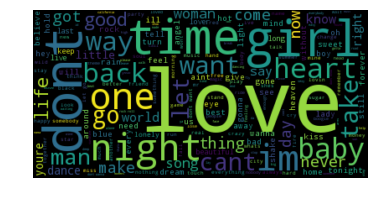

In [5]:
# Generate a word cloud image from Song Names
wordcloud = WordCloud().generate(' '.join(df['Song']))
# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [6]:
# store to file
wordcloud.to_file(path.join('..', 'assets', 'songs_cloud.png'))


(-0.5, 399.5, 199.5, -0.5)

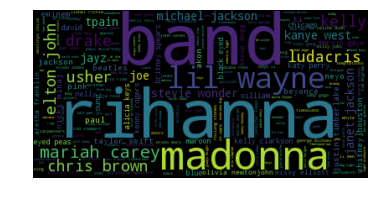

In [7]:
stopwords = set(STOPWORDS)
stopwords.add("featuring")

# generate word cloud
wordcloud2 = WordCloud(stopwords=stopwords)
wordcloud2.generate(' '.join(df['Artist']))


# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

In [8]:
wordcloud2.to_file(path.join('..', 'assets', 'artists_cloud.png'))

# Most Frequently in Billboard 100 List


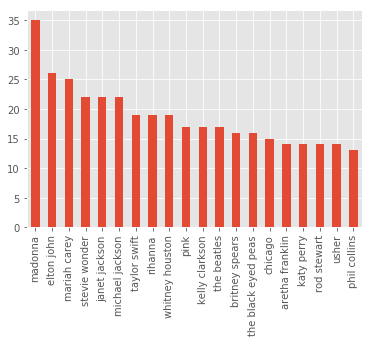

In [9]:
fig, ax = plt.subplots()
df['Artist'].value_counts()[:20].plot(ax=ax, kind='bar')
fig.savefig(path.join('..', 'assets', 'most_artists.png'))


# Average Hits Per Year vs Career Lifespan

In [ ]:

grouped_df = df.groupby( [ "Artist"] ).size().reset_index(name = "Song_Count")
grouped_df['First_Year'] = 0
grouped_df['Last_Year'] = 0
grouped_df.head()

,Artist,Song_Count,First_Year,Last_Year
0,the mysterians,1,0,0
1,100 proof aged in soul,1,0,0
2,10000 maniacs,1,0,0
3,10cc,2,0,0
4,112,3,0,0


In [ ]:
for i in range(0, len(grouped_df)):
    name = grouped_df.Artist[i]
    rows = df[(df.Artist == name)]
    grouped_df['First_Year'][i] = rows.Year.min()
    grouped_df['Last_Year'][i] = rows.Year.max()
#     first = rows.Year.min()
#     last = rows.Year.max()
# print first, last


/Users/manulohiya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/manulohiya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [ ]:
grouped_df['Career_Span'] = grouped_df['Last_Year'] - grouped_df['First_Year']+1
grouped_df.head()


In [ ]:
grouped_df['Avg_Songs_Per_Year'] = grouped_df['Song_Count']/grouped_df['Career_Span']
grouped_df_min5 = grouped_df[(grouped_df.Song_Count > 4)]
grouped_df_min5.head()


In [ ]:
y = grouped_df_min5.Avg_Songs_Per_Year
x = grouped_df_min5.Career_Span
# plt.scatter(x, y, s=area, c=colors, alpha=0.5)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Song Frequency By Career Span')
ax.set_xlabel('Career Span')
ax.set_ylabel('Average Hits Per Year')

plt.scatter(x,y)
plt.show()

In [ ]:
fig.savefig(path.join('..', 'assets', 'song_frequency.png'))

# Career Span

In [ ]:

grouped_df_top20 = grouped_df.nlargest(20, 'Song_Count')
grouped_df_top20.head()

In [ ]:
min_xrange = grouped_df_top20.First_Year.min()
max_xrange = grouped_df_top20.Last_Year.max()
min_yrange = grouped_df_top20.Song_Count.min()
max_yrange = grouped_df_top20.Song_Count.max()

In [ ]:
# for i in range(0,5):
fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(111)
plt.plot([grouped_df_top20.First_Year, grouped_df_top20.Last_Year], [grouped_df_top20.Song_Count, grouped_df_top20.Song_Count], lw=20, color="orange", solid_capstyle="butt")


# Need to figure out how to add the Artist Name to this chart
# ax.annotate(grouped_df_top20.Artist, xy=(1993, 5), xytext=(2000, 2))



plt.yticks(range(min_yrange, max_yrange, 5))
plt.xticks(range(min_xrange, max_xrange, 4))
# plt.margins(0.5)
plt.show()



In [ ]:
fig.savefig(path.join('..', 'assets', 'career_range.png'))